ROHIT KUMAR SHARMA
BATCH- FEB

DATA SCIENCE
TASK 4

Objective - Sales prediction involves forecasting the amount of a product that customers will purchase.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/advertising.csv")
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Insights from Data

HIGHEST EXPENSES SPENDS ON TV

LOWEST EXPENSE SPENDS ON RADIO

MAX SALE IS 27 AND MINIMUM SALE IS 1.6

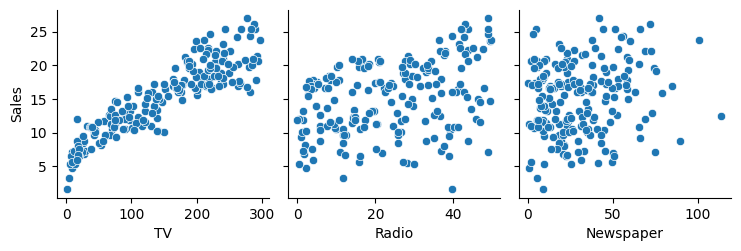

In [5]:
sns.pairplot(data, x_vars=['TV', 'Radio','Newspaper'],y_vars='Sales', kind='scatter')
plt.show()


Insights from Above Scatter Plot

when AD cost increases than the TV sales is also increases.

<Axes: title={'center': 'HISTOGRAM OF TV ADS EXPENCES'}, ylabel='Frequency'>

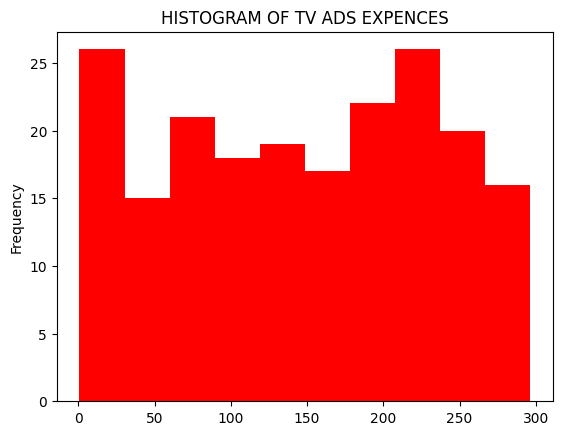

In [6]:
data['TV'].plot.hist(bins=10,color="red",title="HISTOGRAM OF TV ADS EXPENCES")


<Axes: title={'center': 'HISTOGRAM OF RADIO ADS EXPENCES'}, ylabel='Frequency'>

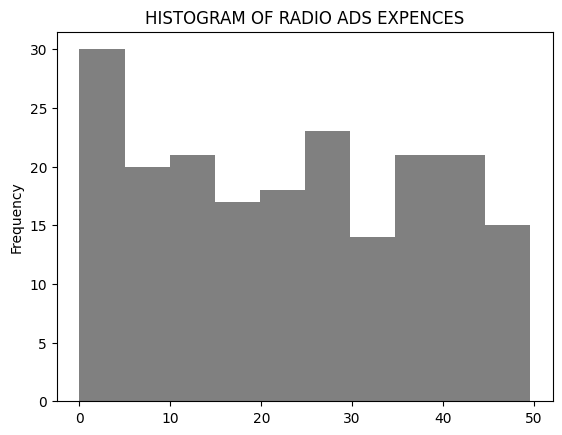

In [7]:
data['Radio'].plot.hist(bins=10, color="grey", title="HISTOGRAM OF RADIO ADS EXPENCES")

<Axes: title={'center': 'HISTOGRAM OF NEWSPAPER ADS EXPENCES'}, ylabel='Frequency'>

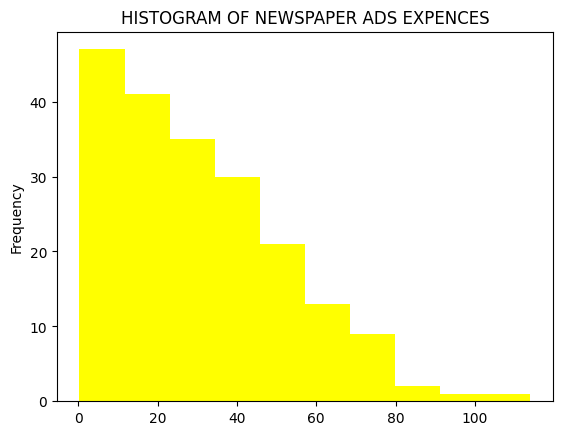

In [8]:
data['Newspaper'].plot.hist(bins=10,color="yellow",title="HISTOGRAM OF NEWSPAPER ADS EXPENCES" )

Insights from above Histograms

Most of the sales is due to the low ad cost in newspaper

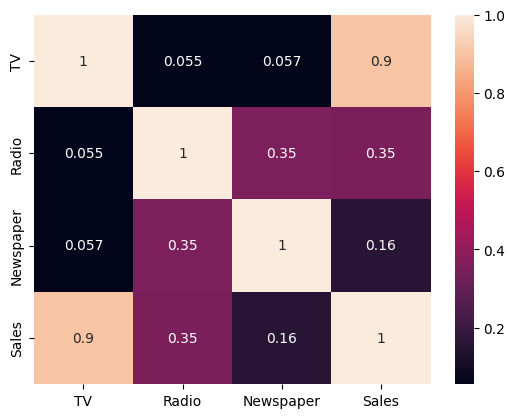

In [9]:
sns.heatmap(data.corr(),annot = True)
plt.show()

The above Heatmap shows the relation between variables.

From above we get to know that sales is corelated with TV as the coffeficient between these two are 0.9

Linear Regression model

TRAIN TEST SPLIT

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['TV']], data[['Sales']], test_size = 0.3,random_state=3
                                                    )

In [11]:
print(X_train)


        TV
77   120.5
73   129.4
71   109.8
78     5.4
42   293.6
..     ...
0    230.1
184  253.8
131  265.2
152  197.6
106   25.0

[140 rows x 1 columns]


In [12]:

print(y_train)

     Sales
77    14.2
73    11.0
71    12.4
78     5.3
42    20.7
..     ...
0     22.1
184   17.6
131   17.7
152   16.6
106    7.2

[140 rows x 1 columns]


In [13]:
print(X_test)

        TV
40   202.5
51   100.4
139  184.9
197  177.0
170   50.0
82    75.3
183  287.6
46    89.7
70   199.1
100  222.4
179  165.6
83    68.4
25   262.9
190   39.5
159  131.7
173  168.4
95   163.3
3    151.5
41   177.0
58   210.8
14   204.1
143  104.6
12    23.8
6     57.5
182   56.2
161   85.7
128  220.3
122  224.0
101  296.4
86    76.3
64   131.1
47   239.9
158   11.7
34    95.7
38    43.1
196   94.2
4    180.8
72    26.8
67   139.3
145  140.3
156   93.9
115   75.1
155    4.1
15   195.4
61   261.3
175  276.9
120  141.3
130    0.7
23   228.3
153  171.3
31   112.9
103  187.9
89   109.8
132    8.4
109  255.4
126    7.8
17   281.4
30   292.9
178  276.7
162  188.4


In [14]:
print(y_test)

     Sales
40    16.6
51    10.7
139   20.7
197   14.8
170    8.4
82    11.3
183   26.2
46    10.6
70    18.3
100   16.7
179   17.6
83    13.6
25    17.0
190   10.8
159   12.9
173   16.7
95    16.9
3     16.5
41    17.1
58    23.8
14    19.0
143   10.4
12     9.2
6     11.8
182    8.7
161   13.3
128   24.7
122   16.6
101   23.8
86    12.0
64    16.0
47    23.2
158    7.3
34    11.9
38    10.1
196   14.0
4     17.9
72     8.8
67    13.4
145   10.3
156   15.3
115   12.6
155    3.2
15    22.4
61    24.2
175   27.0
120   15.5
130    1.6
23    20.5
153   16.0
31    11.9
103   19.7
89    16.7
132    5.7
109   19.8
126    6.6
17    24.4
30    21.4
178   16.8
162   19.9


MODEL

In [15]:
#linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [16]:
res= model.predict(X_test)
print(res)

[[17.97069168]
 [12.52005499]
 [17.03111082]
 [16.60936714]
 [ 9.82943708]
 [11.18008456]
 [22.51377868]
 [11.94883254]
 [17.78918174]
 [19.03305868]
 [16.00077499]
 [10.81172616]
 [21.19516236]
 [ 9.26889168]
 [14.19101413]
 [16.15025377]
 [15.87798886]
 [15.2480426 ]
 [16.60936714]
 [18.41378947]
 [18.05610812]
 [12.74427315]
 [ 8.43074285]
 [10.22982665]
 [10.16042579]
 [11.73529144]
 [18.9209496 ]
 [19.11847512]
 [22.98356911]
 [11.23346984]
 [14.15898297]
 [19.96730101]
 [ 7.78478101]
 [12.2691442 ]
 [ 9.46107867]
 [12.18906628]
 [16.81223119]
 [ 8.59089867]
 [14.59674223]
 [14.65012751]
 [12.1730507 ]
 [11.16940751]
 [ 7.37905291]
 [17.59165622]
 [21.10974591]
 [21.94255622]
 [14.70351279]
 [ 7.19754297]
 [19.3480318 ]
 [16.30507107]
 [13.18737094]
 [17.19126665]
 [13.02187659]
 [ 7.60860959]
 [20.79477279]
 [ 7.57657843]
 [22.18278996]
 [22.79672064]
 [21.93187917]
 [17.21795929]]


In [17]:
model.coef_

array([[0.05338528]])

In [18]:
model.intercept_

array([7.16017327])

Sales = model coefficient*TV + model interception

In [19]:
0.05473199* 69.2 + 7.14382225

10.931275958

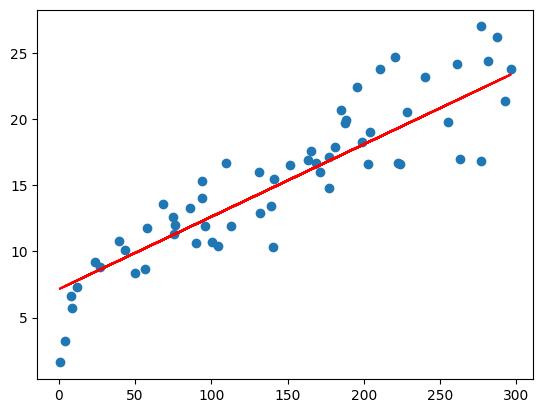

In [20]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 7.14382225 + 0.05473199 * X_test, 'r')
plt.show()

MODEL CAN PREDICT EFFICIENTLY BY USING ADVERTISING PLATFORM DATASET